# Figure S4

In [3]:

from scipy.integrate import odeint, solve_ivp, lsoda
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from lmfit import Parameters, minimize, Model, report_fit, conf_interval
from sklearn.metrics import mean_squared_error
import numdifftools
from PIL import Image
from sklearn.metrics import r2_score
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



import scipy.optimize
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as tkr
import scipy.stats as st
from scipy.stats import scoreatpercentile



import glob
                                                            


In [33]:
def monoexponential(x, A, k, B):
    """
    Compute the value of a monoexponential function at point x.
    
    Args:
        x (float): The input value.
        A (float): Amplitude or initial value.
        k (float): Decay constant or growth rate.
    
    Returns:
        float: The value of the monoexponential function at point x.
    """
    return B + (A * np.exp(-k * x))

In [ ]:
def fit_monoexponential_Azides_Yield(df):
    t = df["Time"].values
    azide1 = df["Conversion"].values

    # Fit data to monoexponential function
    popt1, pcov1 = curve_fit(monoexponential, t, azide1, p0=[100, 0.5, azide1[-2:].mean()])

    # Calculate uncertainties
    perr1 = np.sqrt(np.diag(pcov1))

    return pd.DataFrame({"Azide1": popt1, "Azide1_err": perr1}, index=["A", "k", "B"])


# Asthetics

In [4]:
colors = [  "#56B4E9", "#009E73", "#CC79A7", "#999999", "#E69F00","#DB2B39", "#0076A1", "#0072B2", "#1A5042","#0C1713"]
palette = sns.color_palette(colors)

sns.set_theme(context='notebook', style='ticks', font='Arial', 
              font_scale=1.3, 
              rc={"lines.linewidth": 1, 'axes.linewidth':1, 
                                  "xtick.major.width":1,"ytick.major.width":1}, 
              palette = palette)
sns.color_palette(colors)

[(0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.0, 0.6196078431372549, 0.45098039215686275),
 (0.8, 0.4745098039215686, 0.6549019607843137),
 (0.6, 0.6, 0.6),
 (0.9019607843137255, 0.6235294117647059, 0.0),
 (0.8588235294117647, 0.16862745098039217, 0.2235294117647059),
 (0.0, 0.4627450980392157, 0.6313725490196078),
 (0.0, 0.4470588235294118, 0.6980392156862745),
 (0.10196078431372549, 0.3137254901960784, 0.25882352941176473),
 (0.047058823529411764, 0.09019607843137255, 0.07450980392156863)]

In [28]:
df = pd.read_csv("FigureS4.csv")
df

,Time,Azide_1,Type,Conversion
0,0,Arg,pSS,0.000000
1,1,Arg,pSS,30.402551
2,2,Arg,pSS,32.619640
3,4,Arg,pSS,57.756851
4,8,Arg,pSS,76.904170
...,...,...,...,...
91,1,kArg,no_pSS,4.507264
92,2,kArg,no_pSS,63.499819
93,4,kArg,no_pSS,80.879996
94,8,kArg,no_pSS,87.756579


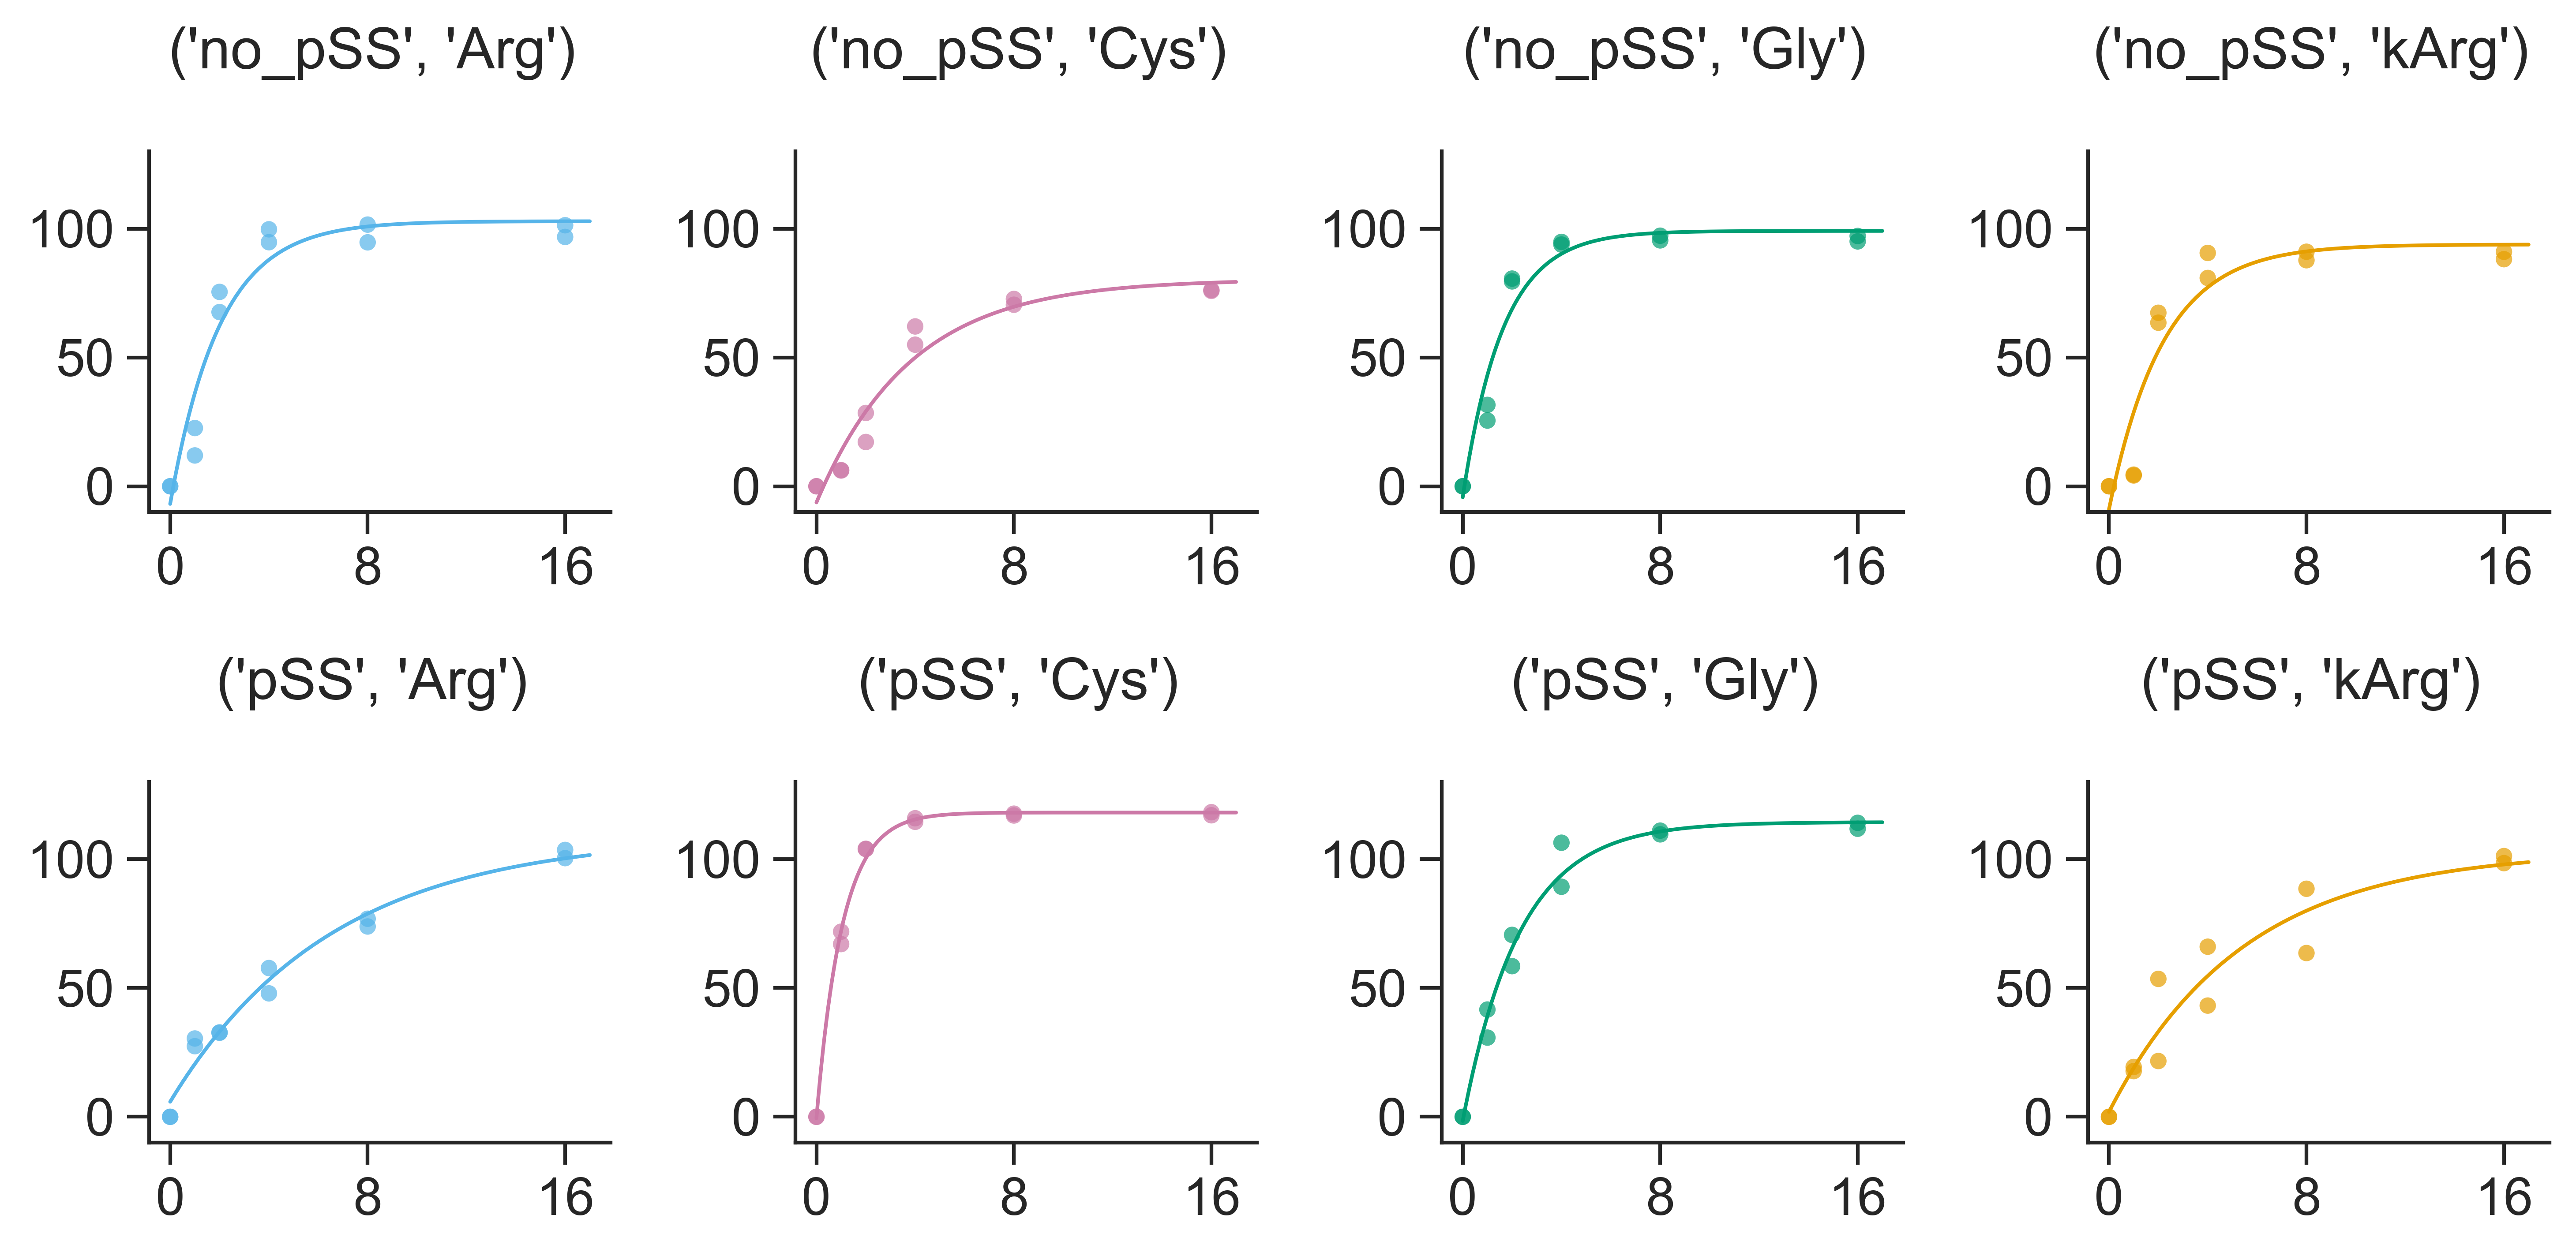

In [31]:
colors = ("C0", "C2", "C1","C4")*2
fits = []
df["Replica"] = sorted(["A", "B"]*6)*8

# Calcula el número de subgráficos necesarios
num_plots = len(df.groupby(["Type", "Azide_1"]))

fig, axs = plt.subplots(2, ncols=4, figsize=(10, 5), dpi=600)
ejes = axs.flatten()

for o, i in enumerate(df.groupby(["Type", "Azide_1"])):
    if o >= num_plots:
        break  # Salir del bucle si hemos alcanzado el número de subgráficos necesarios
    
    fit = fit_monoexponential_Azides_Yield(i[1])
    fit["Type"] = i[0][0]
    fit["Azide_1"] = i[0][1]
    fits.append(fit)
    x_sim = np.linspace(0, 17, 1000)
    
    y_sim = monoexponential(x_sim, fit["Azide1"].iloc[0], fit["Azide1"].iloc[1], fit["Azide1"].iloc[2])

    sns.scatterplot(data=i[1], x="Time", y="Conversion", ax=ejes[o], 
                    edgecolor="none", s=20, legend=False, 
                    color=colors[o], alpha=0.7)
    
    ejes[o].plot(x_sim, y_sim, c=colors[o])
    sns.despine(ax=ejes[o], left=False, bottom=False)
    
    ejes[o].set(xlabel = "", ylabel = "", xticks = np.linspace(0, 16, 3), yticks = np.linspace(0, 100, 3), ylim = (-10, 130), title = f"{i[0]} \n")
    

plt.tight_layout()



In [32]:
ks = pd.concat(fits, axis = 0).loc["k"]
round(ks, 3)

,Azide1,Azide1_err,Type,Azide_1
k,0.498,0.107,no_pSS,Arg
k,0.262,0.053,no_pSS,Cys
k,0.613,0.106,no_pSS,Gly
k,0.456,0.127,no_pSS,kArg
k,0.153,0.028,pSS,Arg
k,0.950,0.039,pSS,Cys
k,0.432,0.046,pSS,Gly
k,0.184,0.058,pSS,kArg
